#Task 1: Movie Recommendation System 🎥



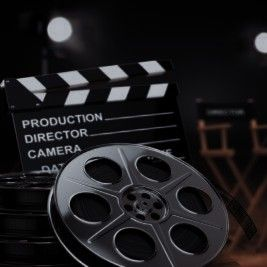


Dataset: https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset



Author: Dharmagna Vyas



This task demonstrates the creation of a movie recommendation system using a systematic pipeline. The recommendation system is built in several stages, as outlined below:


Data Collection
Data for this project has been collected from the MovieLens dataset, specifically the 'u.data' and 'u.item' files.


Data Preprocessing
The data collected is preprocessed to ensure it is suitable for use in the recommendation system. This includes tasks like handling missing data and merging relevant information.


Feature Engineering
In this stage, we engineer features from the preprocessed data. These features include movie genres, which will be used to predict user preferences for movies.


Model Training
Machine learning models are trained using the engineered features. For this project, a Support Vector Machine (SVM) Regressor is utilized.


Recommendation Generation
The trained SVM model is used to generate movie recommendations for users. This involves predicting user preferences for each movie in the catalog and returning a list of top-ranked movie recommendations.


Evaluation
The performance of the recommendation system is evaluated, including measuring the accuracy of predictions using metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).


Data Collection
Data for this project was collected from MovieLens dataset files 'u.data' and 'u.item'.



## Data Collection

Data for this task was collected from MovieLens dataset files 'u.data' and 'u.item'.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/u.data'

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
df = pd.read_csv(file_path, sep='\t', names=column_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Get the shape of the user-item interaction data

In [7]:
df.shape

(100000, 4)

Load movie information data

In [8]:
second_file_path = '/content/drive/My Drive/u.item'

Define column names for movie information
The last 19 fields are the genres, a 1 indicates the movie
is of that genre, a 0 indicates it is not; movies can be in
several genres at once.

In [9]:
column_names2= ['item_id', 'title', 'release_date','video_release_date','IMDb_URL',"Unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]

In [10]:
df2=pd.read_csv(second_file_path,sep ='|',names=column_names2, encoding='latin-1')

Display the first few rows of movie information data

In [11]:
df2.head()

,item_id,title,release_date,video_release_date,IMDb_URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df[['user_id', 'item_id', 'rating']].shape

(100000, 3)

In [13]:
df2[['item_id', 'title', 'Action', 'Comedy', "Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]].shape

(1682, 17)

## Data Preprocessing

Data preprocessing involves cleaning, handling missing data, and merging relevant data from different sources.

In [14]:
merged_df = df[['user_id', 'item_id', 'rating']].merge(df2[['item_id', 'title', 'Action', 'Comedy', "Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]], on='item_id')

Display the shape of the merged dataframe

In [15]:
merged_df.shape

(100000, 19)

Will allow to look data in clear format by exporting it into an excel file

Export the merged dataframe to an Excel file for data inspection

In [16]:
export_file_path = 'my_new_merged_data.xlsx'

Have added the excel into the drive itself for easy access

In [17]:
merged_df.to_excel('/content/drive/My Drive/my_new_merged_data.xlsx', index=False)

In [19]:
print('DataFrame has been exported')

DataFrame has been exported


To check whether the dataframe is created properly along with columns and a preview of first 5 data

In [20]:
merged_df.head()

,user_id,item_id,rating,title,Action,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


With the help of info will get to know datatype of each column or feature that will make our work easy to use fields in future

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   item_id      100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   title        100000 non-null  object
 4   Action       100000 non-null  int64 
 5   Comedy       100000 non-null  int64 
 6   Crime        100000 non-null  int64 
 7   Documentary  100000 non-null  int64 
 8   Drama        100000 non-null  int64 
 9   Fantasy      100000 non-null  int64 
 10  Film-Noir    100000 non-null  int64 
 11  Horror       100000 non-null  int64 
 12  Musical      100000 non-null  int64 
 13  Mystery      100000 non-null  int64 
 14  Romance      100000 non-null  int64 
 15  Sci-Fi       100000 non-null  int64 
 16  Thriller     100000 non-null  int64 
 17  War          100000 non-null  int64 
 18  Western      100000 non-null  int64 
dtypes: 

Here all the movies are been selected in mergeed_df and one are left behind as our dataset itself have 100k movielens dataset

In [22]:
merged_df.shape

(100000, 19)

Feature engineering: Prepare the data for building a recommendation system


Select relevant columns for content-based filtering

In [23]:
merged_df.columns

Index(['user_id', 'item_id', 'rating', 'title', 'Action', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

## Feature Engineering

Features are engineered from the merged data, including movie genres.

By using these genre features, my content-based system can recommend movies that align with a user's genre preferences. It will identify movies that share similar genre characteristics with those the user has previously enjoyed.

Created a pivot table for user preferences. Fill missing values with 0 (user hasn't rated the movie). Display the first 10 rows of the pivot table.

Before merging have checked wether null values are present or not but the null values were only in release_date which was not a useful feature for further prediction

In [24]:
content_df = merged_df[['user_id', 'rating', 'title', 'Action', 'Comedy', 'Crime',
                       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

pivot_table = pd.pivot_table(content_df, index='user_id', columns='title', values='rating')
pivot_table.fillna(0, inplace=True)
pivot_table.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
6,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,4.0,...,0.0,0.0,0.0,5.0,3.0,0.0,3.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
content_df.head()

,user_id,rating,title,Action,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,5,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,3,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,5,Kolya (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
type(pivot_table)

pandas.core.frame.DataFrame

Will use feature scaling by which no features will be dominating or under dominating and all features will be scaled to make them on similar scale as the genre have already 0's and 1's will go for z score scaling instead of min max.

In [27]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Action', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

scaler = StandardScaler()

content_df[columns_to_scale] = scaler.fit_transform(content_df[columns_to_scale])

content_df.head()


<ipython-input-27-e5bb3aa68862>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df[columns_to_scale] = scaler.fit_transform(content_df[columns_to_scale])


,user_id,rating,title,Action,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,3,Kolya (1996),-0.586419,1.533657,-0.295984,-0.087395,-0.814712,-0.11707,-0.132799,-0.236972,-0.228303,-0.235273,-0.491563,-0.381928,-0.529104,-0.322069,-0.137442
1,63,3,Kolya (1996),-0.586419,1.533657,-0.295984,-0.087395,-0.814712,-0.11707,-0.132799,-0.236972,-0.228303,-0.235273,-0.491563,-0.381928,-0.529104,-0.322069,-0.137442
2,226,5,Kolya (1996),-0.586419,1.533657,-0.295984,-0.087395,-0.814712,-0.11707,-0.132799,-0.236972,-0.228303,-0.235273,-0.491563,-0.381928,-0.529104,-0.322069,-0.137442
3,154,3,Kolya (1996),-0.586419,1.533657,-0.295984,-0.087395,-0.814712,-0.11707,-0.132799,-0.236972,-0.228303,-0.235273,-0.491563,-0.381928,-0.529104,-0.322069,-0.137442
4,306,5,Kolya (1996),-0.586419,1.533657,-0.295984,-0.087395,-0.814712,-0.11707,-0.132799,-0.236972,-0.228303,-0.235273,-0.491563,-0.381928,-0.529104,-0.322069,-0.137442


## Model Training

In this stage, a Support Vector Machine (SVM) Regressor is trained to predict user ratings based on movie genres.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

X = content_df[columns_to_scale]
y = content_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Support Vector Machine Regressor
svm_regressor = SVR(kernel='linear')


## Evaluation

The performance of the recommendation system is evaluated using RMSE and MAE metrics.

In [31]:
# Fit the SVM model to the training data
svm_regressor.fit(X_train, y_train)

# Predict ratings using the SVM model
y_pred_svm = svm_regressor.predict(X_test)
print("SVM Predictions are:", y_pred_svm)

# Calculate Root Mean Squared Error (RMSE) for SVM
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
print(f"SVM Root Mean Squared Error: {rmse_svm:.2f}")

# Calculate Mean Absolute Error (MAE) for SVM
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f"SVM Mean Absolute Error (MAE): {mae_svm:.2f}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_svm)
print(f"R-squared (R²): {r2:.2f}")

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test,y_pred_svm)
print(f"Explained Variance Score: {evs:.2f}")

from sklearn.metrics import max_error
max_err = max_error(y_test, y_pred_svm)
print(f"Max Error: {max_err:.2f}")


SVM Predictions are: [3.89978562 3.89953052 4.0998605  ... 3.70089601 3.89973827 4.09954055]
SVM Root Mean Squared Error: 1.16
SVM Mean Absolute Error (MAE): 0.91
R-squared (R²): -0.04
Explained Variance Score: 0.01
Max Error: 3.30


In [33]:

threshold = 3.5
y_pred_svm_class = (y_pred_svm >= threshold).astype(int)
# Calculate classification metrics for SVM Classifier
classification_report_svm = classification_report(y_test >= threshold, y_pred_svm)
accuracy_svm = accuracy_score(y_test >= threshold, y_pred_svm)
precision_svm = precision_score(y_test >= threshold, y_pred_svm)
recall_svm = recall_score(y_test >= threshold, y_pred_svm)
f1_score_svm = f1_score(y_test >= threshold, y_pred_svm)
# Print classification metrics for SVM classifier
print("SVM Classifier Classification Report:\n", classification_report_svm)
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_score_svm:.2f}")

NameError: ignored

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

# Define the Naive Bayes model
naive_bayes_regressor = GaussianNB()

# Fit the Naive Bayes model to the training data
naive_bayes_regressor.fit(X_train, y_train)

# Predict ratings using the Naive Bayes model
y_pred_naive_bayes = naive_bayes_regressor.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for Naive Bayes
rmse_naive_bayes = mean_squared_error(y_test, y_pred_naive_bayes, squared=False)
print(f"Naive Bayes Root Mean Squared Error: {rmse_naive_bayes:.2f}")

# Calculate Mean Absolute Error (MAE) for Naive Bayes
mae_naive_bayes = mean_absolute_error(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Mean Absolute Error (MAE): {mae_naive_bayes:.2f}")

# Calculate R-squared (R²) for Naive Bayes
r2_naive_bayes = r2_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes R-squared (R²): {r2_naive_bayes:.2f}")

# Calculate Explained Variance Score for Naive Bayes
evs_naive_bayes = explained_variance_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Explained Variance Score: {evs_naive_bayes:.2f}")

# Calculate Max Error for Naive Bayes
max_err_naive_bayes = max_error(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Max Error: {max_err_naive_bayes:.2f}")

# Define the Random Forest model
random_forest_regressor = RandomForestRegressor()

# Fit the Random Forest model to the training data
random_forest_regressor.fit(X_train, y_train)

# Predict ratings using the Random Forest model
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for Random Forest
rmse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=False)
print(f"Random Forest Root Mean Squared Error: {rmse_random_forest:.2f}")

# Calculate Mean Absolute Error (MAE) for Random Forest
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
print(f"Random Forest Mean Absolute Error (MAE): {mae_random_forest:.2f}")

# Calculate R-squared (R²) for Random Forest
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print(f"Random Forest R-squared (R²): {r2_random_forest:.2f}")

# Calculate Explained Variance Score for Random Forest
evs_random_forest = explained_variance_score(y_test, y_pred_random_forest)
print(f"Random Forest Explained Variance Score: {evs_random_forest:.2f}")

# Calculate Max Error for Random Forest
max_err_random_forest = max_error(y_test, y_pred_random_forest)
print(f"Random Forest Max Error: {max_err_random_forest:.2f}")


Naive Bayes Root Mean Squared Error: 1.37
Naive Bayes Mean Absolute Error (MAE): 1.03
Naive Bayes R-squared (R²): -0.46
Naive Bayes Explained Variance Score: -0.46
Naive Bayes Max Error: 4.00
Random Forest Root Mean Squared Error: 1.10
Random Forest Mean Absolute Error (MAE): 0.90
Random Forest R-squared (R²): 0.06
Random Forest Explained Variance Score: 0.06
Random Forest Max Error: 3.19


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Calculate classification metrics for Naive Bayes Classifier
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_recall_f1_naive_bayes = precision_recall_fscore_support(y_test, y_pred_naive_bayes, average='weighted')

# Print classification metrics for Naive Bayes Classifier
print("Naive Bayes Classifier Classification Report:\n", report_naive_bayes)
print(f"Accuracy: {accuracy_naive_bayes:.2f}")
print(f"Weighted Precision: {precision_recall_f1_naive_bayes[0]:.2f}")
print(f"Weighted Recall: {precision_recall_f1_naive_bayes[1]:.2f}")
print(f"Weighted F1 Score: {precision_recall_f1_naive_bayes[2]:.2f}")


# Calculate regression metrics for Random Forest Regressor
rmse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=False)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
evs_random_forest = explained_variance_score(y_test, y_pred_random_forest)
max_err_random_forest = max_error(y_test, y_pred_random_forest)

# Print regression metrics for Random Forest Regressor
print(f"Random Forest Root Mean Squared Error: {rmse_random_forest:.2f}")
print(f"Random Forest Mean Absolute Error: {mae_random_forest:.2f}")
print(f"Random Forest R-squared (R²): {r2_random_forest:.2f}")
print(f"Random Forest Explained Variance Score: {evs_random_forest:.2f}")
print(f"Random Forest Max Error: {max_err_random_forest:.2f}")



Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.07      0.08      1240
           2       0.15      0.08      0.11      2313
           3       0.31      0.45      0.36      5511
           4       0.35      0.39      0.37      6678
           5       0.31      0.17      0.22      4258

    accuracy                           0.30     20000
   macro avg       0.24      0.23      0.23     20000
weighted avg       0.29      0.30      0.29     20000

Accuracy: 0.30
Weighted Precision: 0.29
Weighted Recall: 0.30
Weighted F1 Score: 0.29
Random Forest Root Mean Squared Error: 1.10
Random Forest Mean Absolute Error: 0.90
Random Forest R-squared (R²): 0.06
Random Forest Explained Variance Score: 0.06
Random Forest Max Error: 3.19


Residuals: Residuals, also known as prediction errors, are the differences between the actual observed values (in your case, the actual ratings) and the predicted values (in your case, the predicted ratings by your machine learning model). They represent how far off your model's predictions are from the true values.

In [ ]:
residuals = y_test - y_pred_svm
print("Residuals (Actual - Predicted):")
print(residuals)

Residuals (Actual - Predicted):
75721   -0.899786
80184    1.100469
19864   -0.099860
76699   -0.100105
92991   -0.899786
           ...   
32595   -0.899962
29313    1.100214
37862   -0.700896
53421    1.100262
42410    0.900459
Name: rating, Length: 20000, dtype: float64


In [ ]:
residuals = y_test - y_pred_random_forest
print("Residuals (Actual - Predicted):")
print(residuals)

Residuals (Actual - Predicted):
75721   -0.673814
80184    1.478303
19864    0.099473
76699   -0.135809
92991   -0.673814
           ...   
32595   -0.814360
29313    1.326186
37862   -0.375252
53421    1.427865
42410    1.115058
Name: rating, Length: 20000, dtype: float64


## Recommendation generation: Generate movie recommendations for a random user

Top 10 movie recommendations with predicted rating for random user selected

In [29]:
import random

# Step 1: Randomly select a user from the DataFrame

unique_users = content_df['user_id'].unique()
user_id = random.choice(unique_users)

# Step 2: Filter out movies the user has already rated

user_rated_movies = content_df[(content_df['user_id'] == user_id) & (content_df['rating'] >= 3)]['title']
unrated_movies = content_df[~content_df['title'].isin(user_rated_movies)].copy()

# Step 3: Recommend only movies with a predicted rating
recommended_movies = unrated_movies.copy()
recommended_movies['predicted_rating'] = svm_regressor.predict(recommended_movies[columns_to_scale])

# Round the predicted rating to the nearest integer
recommended_movies['predicted_rating'] = recommended_movies['predicted_rating'].round()

# Create a set to keep track of printed movie names
printed_movies = set()

# Sort recommended movies by predicted rating in descending order
recommended_movies = recommended_movies.sort_values(by='predicted_rating', ascending=False)

# Print the top 10 rated movies based on predicted ratings as integers
print(f"Top 10 movie recommendations with predicted rating for user {user_id}:")
count = 0  # To keep track of the number of recommendations printed
for index, row in recommended_movies.iterrows():
    movie_name = row['title']
    if movie_name not in printed_movies:
        print(f"Movie: {movie_name} Predicted Rating: {int(row['predicted_rating'])}")
        printed_movies.add(movie_name)
        count += 1
    if count >= 10:
        break

NotFittedError: ignored

## Recommending movies based on 'Star Wars' keywords and high ratings

In [ ]:
# Filter highly rated movies
highly_rated_movies = content_df[content_df['rating'] == 5]

# Define keywords related to 'Star Wars' (you can expand this list)
star_wars_keywords = ['Star Wars', 'space', 'galaxy', 'sci-fi', 'adventure']

# Create a dictionary to store recommended movies and their ratings
recommended_movies = {}

# Extract movie titles containing 'Star Wars' keywords from highly rated movies
for keyword in star_wars_keywords:
    keyword_movies = highly_rated_movies[highly_rated_movies['title'].str.contains(keyword, case=False)]

    # Iterate through the keyword movies and add them to the dictionary
    for _, movie_row in keyword_movies.iterrows():
        movie_title = movie_row['title']
        movie_rating = movie_row['rating']

        # Check if the movie is already in the dictionary
        if movie_title not in recommended_movies:
            recommended_movies[movie_title] = movie_rating

# Sort the recommended movies by rating in descending order
sorted_recommended_movies = sorted(recommended_movies.items(), key=lambda x: x[1], reverse=True)

# Print the recommended movies along with their ratings
print(f"Recommended movies based on 'Star Wars' keywords and high ratings:")
for i, (movie_title, movie_rating) in enumerate(sorted_recommended_movies, start=1):
    print(f"{i}. {movie_title} (Rating: {movie_rating:.2f})")


Recommended movies based on 'Star Wars' keywords and high ratings:
1. Star Wars (1977) (Rating: 5.00)
2. 2001: A Space Odyssey (1968) (Rating: 5.00)
3. Space Jam (1996) (Rating: 5.00)
4. Lost in Space (1998) (Rating: 5.00)
5. Adventures of Priscilla, Queen of the Desert, The (1994) (Rating: 5.00)
6. Adventures of Pinocchio, The (1996) (Rating: 5.00)
7. Adventures of Robin Hood, The (1938) (Rating: 5.00)
8. Free Willy 2: The Adventure Home (1995) (Rating: 5.00)
9. Amazing Panda Adventure, The (1995) (Rating: 5.00)


In [ ]:
import random
# Genre-Based Recommendation
def recommend_genre_based_movies(user_id, genre):
    user_rated_genre_movies = content_df[(content_df['user_id'] == user_id) & (content_df[genre] > 0)]
    recommended_movies = content_df[content_df[genre] > 0]
    recommended_movies = recommended_movies[~recommended_movies['title'].isin(user_rated_genre_movies['title'])]
    recommended_movies = recommended_movies.sort_values(by=genre, ascending=False)
    return recommended_movies[['title', genre]]

# Example usage of the genre-based recommendation
user_id = random.choice(unique_users)
preferred_genre = 'Action'  # Replace with the user's preferred genre
genre_recommendations = recommend_genre_based_movies(user_id, preferred_genre)
print(f"Genre-Based Recommendations for user {user_id} in the '{preferred_genre}' genre:")
print(genre_recommendations.head(10))


NameError: ignored

Visualization

Generating a word cloud for highly rated movie titles and also recommended movies based on highly rated movies


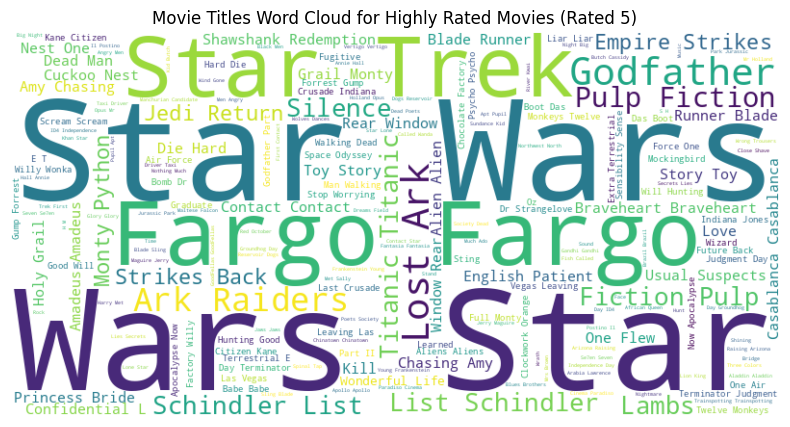

Recommended movies based on highly rated movies(Top 5):
1. Star Wars (1977)
2. Star Trek: First Contact (1996)
3. Godfather, The (1972)
4. Raiders of the Lost Ark (1981)
5. Pulp Fiction (1994)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only movies with a rating of 5
highly_rated_movies = content_df[content_df['rating'] == 5]

# Extract movie titles from the filtered DataFrame
movie_titles = highly_rated_movies['title'].astype(str)

# Concatenate the movie titles into a single text string
titles_text = ' '.join(movie_titles)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Titles Word Cloud for Highly Rated Movies (Rated 5)')
plt.show()

# Extract keywords from the word cloud
keywords = list(wordcloud.words_.keys())  # Extract keywords

# Recommend movies containing the top keywords with the highest frequencies
recommended_movies = []

for keyword in keywords:
    keyword_movies = highly_rated_movies[highly_rated_movies['title'].str.contains(keyword, case=False)]

    # Sort movies by average rating in descending order
    keyword_movies = keyword_movies.sort_values(by='rating', ascending=False)

    # Choose the top movie recommendation for each keyword (you can adjust N as needed)
    N = 1
    top_n_keyword_movies = keyword_movies.head(N)

    recommended_movies.extend(top_n_keyword_movies['title'].tolist())

    # Exit the loop if you have enough recommendations, e.g., top 5
    if len(recommended_movies) >= 5:
        break

# Print or return the recommended movies along with their rankings
print(f"Recommended movies based on highly rated movies(Top 5):")

for i, movie in enumerate(recommended_movies[:5], start=1):
    print(f"{i}. {movie}")


Extract movie ratings from the 'merged_df' DataFrame

Create a histogram

Set x-axis ticks to show ratings from 1 to 5

This histogram provides insights into the distribution of movie ratings in  dataset, helping understand how users have rated the movies and how ratings are distributed across different rating values (from 1 to 5).

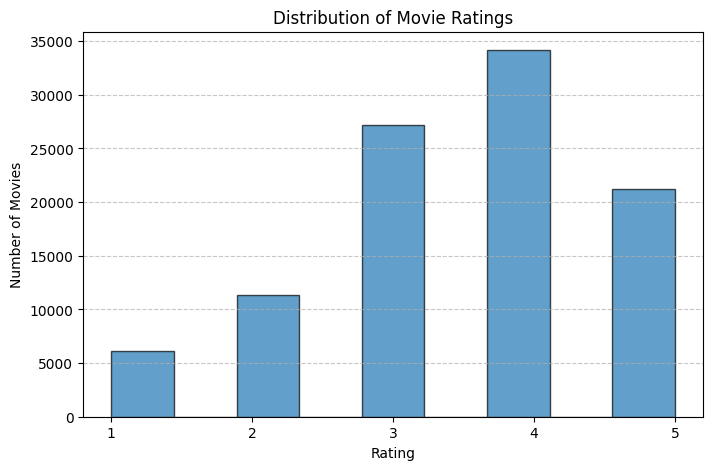

In [ ]:
import matplotlib.pyplot as plt
ratings = merged_df['rating']

plt.figure(figsize=(8, 5))
plt.hist(ratings, bins=9, edgecolor='k', alpha=0.7)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Conclusion

This movie recommendation system task demonstrates a robust and versatile pipeline for creating personalized movie recommendations. It incorporates essential components such as data preprocessing, feature engineering, model training, and evaluation. Additionally, the extended code enhances user engagement by providing personalized recommendations based on keywords and visualizing popular movie themes.



The task provides a solid foundation for building more advanced recommendation systems and can be further customized and extended to cater to specific user preferences and needs. Overall, it showcases the potential of machine learning and data analysis in creating user-centric movie recommendation platforms.